# 11장. 딥러닝 개념 (2)

---

## 학습 목표
- 텐서플로우를 통해 인공신경망을 구현해봅니다.
- 모델 학습을 위한 여러 기법을 비교해봅니다.
- 과적합 방지를 위한 여러 기법들을 사용해봅니다.

---

## 목차

### 1. 인공신경망
1. Keras를 이용한 ANN 구현
2. Tensorflow를 이용한 ANN 구현

### 2. 모델 학습과 과적합 방지
1. Back propagation
2. 다양한 Optimizer기법
3. 과적합 방지 기법

---

## 2. 모델 학습과 과적합 방지

### 2-1. Back propagation

인공신경망은 수많은 노드와 가중치(weight)들을 합하고, 비선형 함수를 계산하여 나타내는 모델입니다. 이 때, loss function에 모델을 적용했을 때 loss function 자체가 convex 하지 않게 되어 global minimum 값을 찾을 수가 없습니다.

non-convex한 함수에 대한 minimum을 찾기 위해, 점진적으로 하강하면서 근방에 local minimum에 접근하는 방법이 있는데요. 이 때 활용되는 것이 gradient descent와 같은 방법입니다.

Back propagation은 loss function에서 각 가중치(weights)에 대해 미분을 진행하여, 그 미분값의 반대방향으로 gradient descent를 하기 위해 사용되는 기법입니다. 가중치의 미분값은 결과인 loss function에 대한 기울기이자, 1만큼 증가할 때의 변화량을 의미합니다.

Back propagation을 위해서 Chain rule 방법으로 복잡한 미분을 간단하게 계산합니다.

### Chain Rule 공식

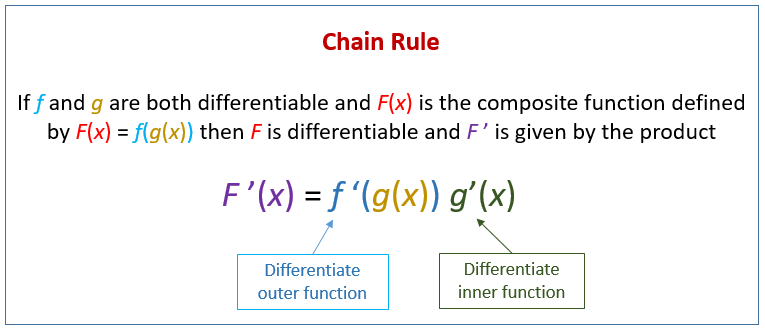

구체적인 실습을 통해 Back propagation 에 대해 알아봅시다.

### 실습

Chain rule 을 활용하여 직접

$f(x,y,z) = (x + y) * zf(x,y,z)=(x+y)∗z$

에 대한 $x, y, z$ 의 미분값을 구해봅시다.

$$\frac{df}{dx}, \frac{df}{dy}, \frac{df}{dz}$$

원래 함수를 다음 함수로 잘게 쪼개어 각 미분값을 구해보세요.
- $f=h*z$
- $h=x+y$

In [1]:
def main():
	# Input 값을 다음과 같이 할당합니다.
    x = -7; y = 3; z = 5

    # Forward propatation 은 차례로 모델의 값을 입력하는 방식입니다.
    # f = (x + y) * z 를 다음과 같이 각 재정의를 통해서 선언합니다.
    h = x + y
    f = h * z

    # 거꾸로 Back propagation을 진행해봅시다:
    # 첫번째 미분 대상은 f = h * z 입니다.
    dfdh = z
    dfdz = h

    # 다음 미분 대상은 h = x + y 입니다.
    dhdx = 1
    dhdy = 1

    # Chain rule 을 적용하여 값을 구해보세요.
    dfdx = dfdh * dhdx
    dfdy = dfdh * dhdy


    if(dfdx == 5 and dfdy == 5 and dfdz == -4):
        print("답 : 정답입니다.")
    else:
        print("답 : 입력값을 다시 넣어 보세요.")

if __name__ == "__main__":
    main()


답 : 정답입니다.


---

### 2-2. 다양한 Optimizer기법

이번 실습에서는 다양한 Optimizer를 소개하고 직접 사용해보도록 하겠습니다. 소개할 Optimizer는 SGD, Adagrad, Adadelta, RMSprop, Adam입니다.

<img src="11-2-2.gif" width="50%" height="50%" title="11-2-2" alt="11-2-2"></img>

### SGD(Stochastic Gradient Descent) optimizer

Gradient descent 알고리즘은 시작 지점에서 기울기의 반대방향으로 하강하면서 loss function을 최소화 된 지점을 찾기 위한 가장 직관적인 방법입니다. 전체 데이터 셋을 가지고 학습 하게 되면 안정적이긴 하지만, 계산량과 학습 비용이 많아지게 됩니다.

이 때, 전체 data set이 아닌, data를 sampling해서 gradient descent를 진행하고, 이를 반복하며 정확도를 찾아나가는 것을 Stochastic Graident Descent라고 합니다.



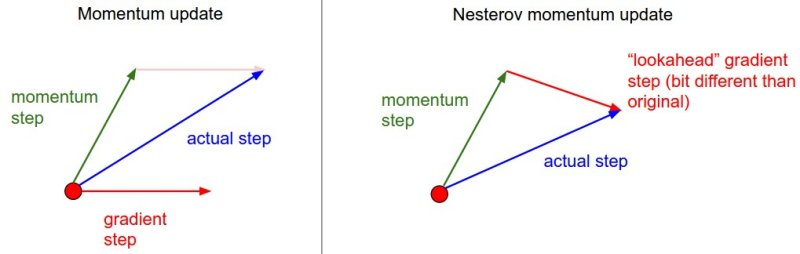

Stochastic gradient descent는 수렴하는 동안 기울기가 진동하여 수렴 시간이 오래 걸리는 단점을 가지고 있습니다. 이를 보완하기 위해 momentum과 nestrov 기법이 사용되어 수렴을 좀 더 빠르게 할 수 있도록 도와줍니다.

- `optimizers.SGD(lr, momentum, nestrov)`
    - lr : learning rate (lr >= 0)
    - momentum : 진동을 막아주고 SGD를 가속화하는 파라메터(momentum >= 0)
    - nesterov : 미분 지점을 유연하게 변경하도록 돕는 파라메터(nesterov = True / False)

### Adagrad optimizer

Adagrad는 loss function에서 최소값을 가지는 최적의 파라메터 W(weights; 가중치)를 찾아내기 위해 step size를 조절해 하강하는 방법 중 하나입니다.

기존에 방식이 파라메터들의 학습속도를 같은 속도로 한꺼번에 갱신하는 방법이었다면, Adagrad는 파라메터 각각의 학습 속도를 데이터에 맞추어(adaptively) 계산하여 적절한 step size로 하강하도록 합니다.

실제로 Adagrad를 적용하면 높은 그라디언트값을 갖는 파라메터(weight)들은 점점 학습속도가 감소하게 되고, 그라디언트 값이 낮거나 업데이트가 거의 없는 파라메터들은 실질 학습속도가 증가하게 됩니다. 이를 통해 최소값에 대한 효율적인 탐색이 가능해집니다.

- `optimizers.Adagrad(lr, epsilon, decay)`
    - lr : learning rate (lr >= 0)
    - epsilon : 연산 시 분모가 0이 되는 것을 막는 0에 가까운 상수(epsilon >= 0; None = default K.epsilon())
    - decay : 각 업데이트 시 learning rate를 비율 만큼 줄여 주는 파라메터(decay >= 0)

### Adadelta optimizer

Adadelta(Adaptive Delta)는 Adagrad의 단점을 보완하기 위해 만들어진 방법입니다.

보통 adagrad에서는 0.01 정도를 learning rate로 지정하게 되면, 다른 설정값(hyper-parameter) 없이 학습이 잘 진행됩니다. 따라서 설정값 여러 개에 크게 의존하지 않는다는 장점이 있습니다 . 하지만, 학습이 오래 진행될 경우 step size가 너무 작아져서 결국 거의 움직이지 않게 됩니다.

Adadelta는 2차 최적화(2nd order optimization) 기법을 따와서 학습 진행에 따라 0에 가까워지는 step size를 조절해 나갈 수 있도록 개선된 알고리즘입니다.

- `optimizers.Adadelta(lr, rho, epsilon, decay)`
    - lr : 초기 learning rate (lr >= 0)
    - rho : Adadelta decay factor (rho >= 0)
    - epsilon : 연산 시 분모가 0이 되는 것을 막는 0에 가까운 상수(epsilon >= 0; None = default K.epsilon())
    - decay : 각 업데이트 시 learning rate를 비율 만큼 줄여 주는 파라메터(decay >= 0)

### RMSprop optimizer

RMSprop 또한 Adagrad 기법의 단점을 보완하고자 제안된 방법입니다.

RMSProp 업데이트는 Adagrad 기법에서 각 미분 값의 제곱을 그대로 더하지 않고, decay 파라메터로 조정하여 빠르게 감소하는 학습속도를 어느 정도 경감시키는 역할을 합니다. 이는 Adagrad에서의 제곱 그라디언트의 평균을 사용하지 않고, 이동평균(moving average)을 사용한 방법입니다.

- `optimizers.RMSprop(lr)`
    - lr : learning rate ( lr >= 0 )

### Adam optimizer

Adam optimizer는 최적화 기법 중 가장 발전된 기법입니다. RMSProp 기법과 모멘텀(momentum)을 함께 사용함으로써, 진행 방향과 step size 모두 적절하게 유지하면서 학습할 수 있도록 고안되었습니다.

- `optimizers.Adam(lr)`
    - lr : learning rate (lr >= 0)

### 실습

1. Optimization 모델을 학습시킬 최적화 방법을 다양한 optimizer를 사용하여 설정해보세요.

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 128)               12928     
_________________________________________________________________
dense_25 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 129       
Total params: 29,569
Trainable params: 29,569
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 1s - loss: 0.6995 - accuracy: 0.5042 - binary_crossentropy: 0.6995 - val_loss: 0.6944 - val_accuracy: 0.5193 - val_binary_crossentropy: 0.6944
Epoch 2/20
25000/25000 - 0s - loss: 0.6895 - accuracy: 0.5316 - binary_crossentropy: 0.6895 - val_loss: 0.6858 - val_accuracy: 0.5490 - val_binary_crossentropy: 0

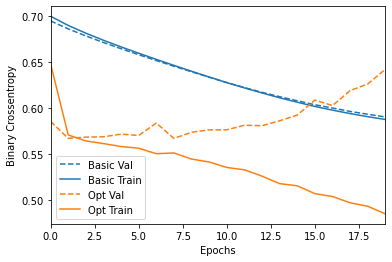

In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import optimizers

# 각각 리뷰에 따른 데이터 길이가 다르기 때문에 데이터의 Shape을 맞춰줘야합니다.
def sequences_shaping(sequences, dimension):
    # 0으로 채워진 (len(sequences), dimension) 크기의 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # 각 리뷰 별 빈도수가 높은 단어를 dimension 개수 만큼만 추출하여 사용합니다.
        
    return results

# 시각화 함수
def Visulaize(histories, key='binary_crossentropy'):
    #plt.figure(figsize=(,20))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])

# 100번째 까지 많이 사용하는 단어까지 추출
word_num = 100
data_num = 25000

# Keras에 내장되어 있는 imdb 데이터 세트를 불러옵니다.
# IMDb 데이터 세트는 Train 25000개 test 25000개로 이루어져 있습니다.
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=word_num)

# 데이터 Shape을 맞춰주기 위한 sequence 함수를 불러옵니다.
train_data = sequences_shaping(train_data, dimension=word_num)
test_data = sequences_shaping(test_data, dimension=word_num)

# Optimizer 모델와 비교하기 위해 기본 모델을 하나 만들어줍니다.
basic_model = keras.Sequential([
    # `.summary` 메서드 때문에 `input_shape`가 필요합니다
    # 첫 번째 Layer에 데이터를 넣을때는 input_shape을 맞춰줘야합니다.
    keras.layers.Dense(128, activation=tf.nn.relu, input_shape=(word_num,)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

# Optimizer를 적용할 모델을 생성합니다.
optimizer_model = keras.Sequential([
    keras.layers.Dense(128, activation=tf.nn.relu, input_shape=(word_num,)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

# 기존 모델을 학습시킬 최적화 방법, loss 계산 방법, 평가 방법을 설정합니다.
basic_model.compile(optimizer='sgd',
                    loss='binary_crossentropy',
                    metrics=['accuracy', 'binary_crossentropy'])
# 현재 모델이 어떻게 이루어져있는지 출력합니다.
basic_model.summary()
# 모델을 학습시킵니다.
basic_history = basic_model.fit(train_data,train_labels,epochs=20,batch_size=500,validation_data=(test_data, test_labels), verbose=2)

'''
Optimization 모델을 학습시킬 최적화 방법, loss 계산 방법, 평가 방법을 설정해보세요.
'''
optimizer_model.compile(optimizer=optimizers.Adam(0.01),
                        loss='binary_crossentropy',
                        metrics=['accuracy', 'binary_crossentropy'])
# Optimization 모델이 어떻게 이루어져있는지 출력합니다.
optimizer_model.summary()
# Optimization 모델을 학습시킵니다.
optimizer_history = optimizer_model.fit(train_data, train_labels, epochs=20, batch_size=500, validation_data=(test_data, test_labels),verbose=2)


# 각 모델 별 Loss 그래프를 그려줍니다.
Visulaize([('Basic', basic_history),('Opt', optimizer_history)])
              


---

### 2.3 과적합 방지 기법

### 드롭아웃(Dropout)

드롭 아웃 (Drop Out)은 모델이 과적합되는 것을 막기 위한 가장 보편적인 Regularization 기법 중 하나입니다.



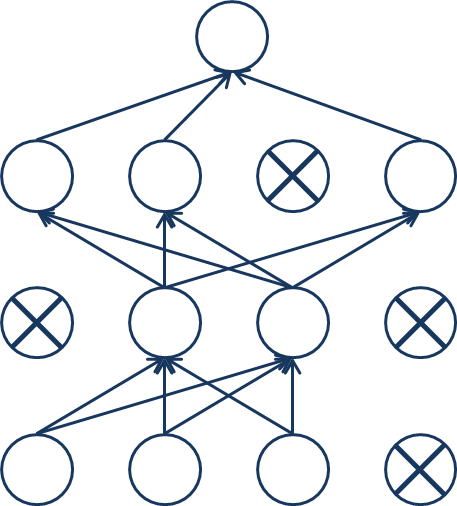

드롭 아웃은 데이터를 학습할 때, 일부 뉴런을 랜덤하게 0으로 만들어 모델 내부의 특정 Weight에 치중되는 것을 막습니다.

이를 통해 모델이 특정 데이터에 치중되는 것을 막고 일반화된 모델을 만들 수 있습니다.

드롭 아웃을 사용하는데 있어 주의할 점은 학습이 끝난 후 테스트 과정에서는 드롭 아웃을 사용하면 안된다는 점입니다.

이번 실습에서 드롭 아웃을 적용한 모델과 적용하지 않은 모델의 Loss 차이를 보겠습니다.

### Drop-out Layer

- `keras.layers.Dropout(prob)`
    - prob : 드롭 아웃을 적용할 확률 (0.1 ~ 0.5)

### 실습

1. 작성된 코드를 보며 이해해보세요.

2. `dropout_model`에 Dropout Layer를 추가해보세요.

3. `basic_model`과 `dropout_model`의 Loss 그래프를 확인해보세요.

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 64)                6464      
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 65        
Total params: 10,689
Trainable params: 10,689
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 20000 samples
Epoch 1/20
20000/20000 - 1s - loss: 0.6492 - accuracy: 0.6179 - binary_crossentropy: 0.6492 - val_loss: 0.6079 - val_accuracy: 0.6715 - val_binary_crossentropy: 0.6079
Epoch 2/20
20000/20000 - 0s - loss: 0.5865 - accuracy: 0.6913 - binary_crossentropy: 0.5865 - val_loss: 0.5850 - val_accuracy: 0.6884 - val_binary_crossentropy: 0

Epoch 19/20
20000/20000 - 0s - loss: 0.5443 - accuracy: 0.7237 - binary_crossentropy: 0.5443 - val_loss: 0.5707 - val_accuracy: 0.6995 - val_binary_crossentropy: 0.5707
Epoch 20/20
20000/20000 - 0s - loss: 0.5390 - accuracy: 0.7263 - binary_crossentropy: 0.5390 - val_loss: 0.5703 - val_accuracy: 0.7016 - val_binary_crossentropy: 0.5703


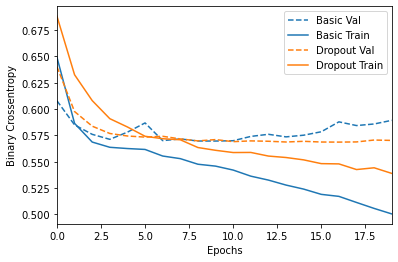

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

# 각각 리뷰에 따른 데이터 길이가 다르기 때문에 데이터의 Shape을 맞춰줘야합니다.
def sequences_shaping(sequences, dimension):
    # 0으로 채워진 (len(sequences), dimension) 크기의 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # 각 리뷰 별 빈도수가 높은 단어를 dimension 개수 만큼만 추출하여 사용합니다.
        
    return results

# 시각화 함수
def Visulaize(histories, key='binary_crossentropy'):
    #plt.figure(figsize=(,20))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])

# 100번째 까지 많이 사용하는 단어까지 추출
word_num = 100
data_num = 20000

# Keras에 내장되어 있는 imdb 데이터 세트를 불러옵니다.
# IMDb 데이터 세트는 Train 25000개 test 25000개로 이루어져 있습니다.
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=word_num)

# 데이터 Shape을 맞춰주기 위한 sequence 함수를 불러옵니다.
train_data = sequences_shaping(train_data, dimension=word_num)
test_data = sequences_shaping(test_data, dimension=word_num)

# 메모리 효율을 위해 데이터 중 data_num개만 사용합니다.
train_data = train_data[:data_num,:]
test_data = test_data[:data_num,:]
train_labels = train_labels[:data_num]
test_labels =test_labels[:data_num]

# 드롭 아웃을 적용한 모델과 비교하기 위해 기본 모델을 하나 만들어줍니다.

basic_model = keras.Sequential([
    # `.summary` 메서드 때문에 `input_shape`가 필요합니다
    # 첫 번째 Layer에 데이터를 넣을때는 input_shape을 맞춰줘야합니다.
    keras.layers.Dense(64, activation=tf.nn.relu, input_shape=(word_num,)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

# 각 Layer에 Dropout이 적용된 모델을 만들어보세요.
dropout_model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, input_shape=(word_num,)),
    # Dense (Fully Connected) Layer에 드롭 아웃을 적용해보세요.
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation=tf.nn.relu),
    # Dense (Fully Connected) Layer에 드롭 아웃을 적용해보세요.
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

# 기존 모델을 학습시킬 최적화 방법, loss 계산 방법, 평가 방법을 설정합니다.
basic_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy', 'binary_crossentropy'])
# 현재 모델이 어떻게 이루어져있는지 출력합니다.
basic_model.summary()
# 모델을 학습시킵니다.
basic_history = basic_model.fit(train_data,train_labels,epochs=20,batch_size=500,validation_data=(test_data, test_labels), verbose=2)

# 기존 모델을 학습시킬 최적화 방법, loss 계산 방법, 평가 방법을 설정합니다.
dropout_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy', 'binary_crossentropy'])
# 현재 모델이 어떻게 이루어져있는지 출력합니다.
dropout_model.summary()
# Drop out이 적용된 모델을 학습시킵니다.
dropout_history = dropout_model.fit(train_data, train_labels, epochs=20, batch_size=500, validation_data=(test_data, test_labels),verbose=2)


# 각 모델 별 Loss 그래프를 그려줍니다.
Visulaize([('Basic', basic_history),('Dropout', dropout_history)])

In [5]:
basic_history

### 정규화(Regularization)

### L1 Regularization

L1 Regularization은 가중치 (Weight)의 절댓값에 비례하는 Loss가 기존 손실 함수에 추가되는 형태입니다.

$TotalLoss = Loss + \lambda\sum_{w}|W|$

L1 Regularization은 모델 내의 일부 가중치를 0으로 만들어 의미있는 가중치만 남도록 만들어줍니다. 이를 통해 모델을 일반화시킬 수 있습니다. 다른 말로 Sparse Model을 만든다 라고도 합니다.

L1 Regularization을 모델에 적용하기 위해
`kernel.layers.Dense()` 내부에 인자로 `keras.regularizers.l1(ratio)`을 추가할 수 있습니다.

- `keras.regularizers.l1(ratio)`
    - ratio : L1을 적용하는 비율 (0.001 ~0.005)



- `keras.layers.Dense(kernel_regularizer, bias_regularizer, activity_regularizer)`
    - kernel_regularizer : Weight에 Regularization 적용
    - bias_regularizer : Bias에 Regularization 적용
    - activity_regularizer : Output y에 Regularization 적용

### L2 Regularization

L2 Regularization은 가중치(Weight)의 제곱에 비례하는 Loss가 기존 손실 함수에 추가되는 형태입니다.

$TotalLoss = Loss + \lambda\sum_{w}W^2$

L2 Regularization은 학습이 진행될 때 가중치의 값이 0에 가까워지도록 만들어줍니다. 가중치를 0으로 만들어주는 L1 Regularization와는 차이가 있습니다.

이를 통해 특정 가중치에 치중되지 않도록 가중치 값을 조율하게 되며 Weight Decay 라고도 부릅니다.

L1 Regularization과 같이 `kernel.layers.Dense()` 내부에 인자로 `keras.regularizers.l2(ratio)`을 추가할 수 있습니다.

- `keras.regularizers.l2(ratio)`
    - ratio : L2을 적용하는 비율 (0.001 ~0.005)

- `keras.layers.Dense(kernel_regularizer, bias_regularizer, activity_regularizer)`
    - kernel_regularizer : Weight에 Regularization 적용
    - bias_regularizer : Bias에 Regularization 적용
    - activity_regularizer : Output y에 Regularization 적용

### 실습

1. 작성된 코드를 보며 이해해보세요. 

2. `L2_regularization_model()`에 L2regularization을 추가해보세요.

3. `basic_model`과 `L2_regularization_model`의 Loss 그래프를 확인하고 과적합을 얼마나 완화시켰는지 분석해보세요.

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               12928     
_________________________________________________________________
dense_13 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 129       
Total params: 29,569
Trainable params: 29,569
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 1s - loss: 0.6259 - accuracy: 0.6439 - binary_crossentropy: 0.6259 - val_loss: 0.5773 - val_accuracy: 0.6980 - val_binary_crossentropy: 0.5773
Epoch 2/20
25000/25000 - 0s - loss: 0.5706 - accuracy: 0.7022 - binary_crossentropy: 0.5706 - val_loss: 0.5704 - val_accuracy: 0.7026 - val_binary_crossentropy: 0

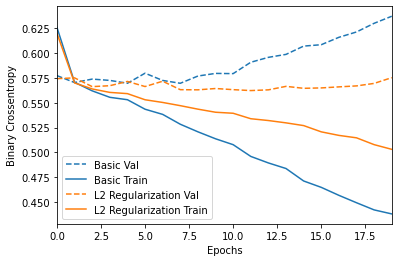

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

# 각각 리뷰에 따른 데이터 길이가 다르기 때문에 데이터의 Shape을 맞춰줘야합니다.
def sequences_shaping(sequences, dimension):
    # 0으로 채워진 (len(sequences), dimension) 크기의 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # 각 리뷰 별 빈도수가 높은 단어를 dimension 개수 만큼만 추출하여 사용합니다.
        
    return results

# 시각화 함수
def Visulaize(histories, key='binary_crossentropy'):
    #plt.figure(figsize=(,20))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])

# 100번째 까지 많이 사용하는 단어까지 추출
word_num = 100
data_num = 25000

# Keras에 내장되어 있는 imdb 데이터 세트를 불러옵니다.
# IMDb 데이터 세트는 Train 25000개 test 25000개로 이루어져 있습니다.
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=word_num)

# 데이터 Shape을 맞춰주기 위한 sequence 함수를 불러옵니다.
train_data = sequences_shaping(train_data, dimension=word_num)
test_data = sequences_shaping(test_data, dimension=word_num)

# L2 Regularization 모델와 비교하기 위해 기본 모델을 하나 만들어줍니다.
basic_model = keras.Sequential([
    # `.summary` 메서드 때문에 `input_shape`가 필요합니다
    # 첫 번째 Layer에 데이터를 넣을때는 input_shape을 맞춰줘야합니다.
    keras.layers.Dense(128, activation=tf.nn.relu, input_shape=(word_num,)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

# 기존 모델에 L2 Regularization을 적용해보겠습니다.
L2_regularization_model = keras.Sequential([
    # 각 Dense (Fully Connected) Layer에 인자로 keras.regularizers.l1을 적용해보세요.
    # Kernel, bias, activity에 하나씩 적용해보며 결과를 비교해보세요.
    keras.layers.Dense(128, activation=tf.nn.relu, input_shape=(word_num,), kernel_regularizer= keras.regularizers.l2(0.001)),
    keras.layers.Dense(128, activation=tf.nn.relu, kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

# 기존 모델을 학습시킬 최적화 방법, loss 계산 방법, 평가 방법을 설정합니다.
basic_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy', 'binary_crossentropy'])
# 현재 모델이 어떻게 이루어져있는지 출력합니다.
basic_model.summary()
# 모델을 학습시킵니다.
basic_history = basic_model.fit(train_data,train_labels,epochs=20,batch_size=500,validation_data=(test_data, test_labels), verbose=2)

# L2 모델을 학습시킬 최적화 방법, loss 계산 방법, 평가 방법을 설정합니다.
L2_regularization_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy', 'binary_crossentropy'])
# L2 모델이 어떻게 이루어져있는지 출력합니다.
L2_regularization_model.summary()
# L2 모델을 학습시킵니다.
L2_regularization_history = L2_regularization_model.fit(train_data, train_labels, epochs=20, batch_size=500, validation_data=(test_data, test_labels),verbose=2)


# 각 모델 별 Loss 그래프를 그려줍니다.
Visulaize([('Basic', basic_history),('L2 Regularization', L2_regularization_history)])
              


---